In [1]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_excel('/content/Supplementary data 3.xlsx')

In [3]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

In [4]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df)

synthetic_data = synthesizer.sample(num_rows=2000)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:162: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [5]:
synthesizer = GaussianCopulaSynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    default_distribution='norm'
)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:162: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


In [6]:
synthetic_data.to_csv('synthetic_data_gc.csv', index=False)

In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 49/49 [00:00<00:00, 1726.24it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 139.66it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    df,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 49/49 [00:00<00:00, 512.27it/s]|
Column Shapes Score: 89.65%

(2/2) Evaluating Column Pair Trends: |██████████| 1176/1176 [00:06<00:00, 192.90it/s]|
Column Pair Trends Score: 96.72%

Overall Score (Average): 93.18%



In [ ]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,TYPE,TVComplement,0.955223
1,MPV,KSComplement,0.951234
2,BASO#,KSComplement,0.076596
3,PHOS,KSComplement,0.957564
4,GLU.,KSComplement,0.906585
5,K,KSComplement,0.952170
6,AST,KSComplement,0.911362
7,BASO%,KSComplement,0.921404
8,Mg,KSComplement,0.943543
9,Menopause,TVComplement,0.989479


In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='TYPE',
    metadata=metadata
)

fig.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv('/content/synthetic_data_gc.csv')
# Select features (excluding the 'SUBJECT_ID' and the target 'TYPE')
X = df2.drop(columns=['TYPE'])
y = df2['TYPE']

# Standardize the features for better performance in logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Let's inspect the shapes to make sure everything looks correct
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 48), (400, 48), (1600,), (400,))

In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model using the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7175


In [10]:
# Get the feature coefficients (weights)
coefficients = log_reg.coef_[0]

# Function to calculate the sigmoid of a value
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function to calculate the summary for each data point
def generate_summary(X_test, coefficients, feature_names, model):
    results = []

    # Compute the linear model (dot product of X and coefficients) and the probabilities
    linear_model = np.dot(X_test, coefficients) + model.intercept_[0]
    probabilities = sigmoid(linear_model)

    # Loop through each data point in the test set
    for idx, (sample, prob) in enumerate(zip(X_test, probabilities)):
        # Calculate contributions for all features for this sample
        contributions = sample * coefficients
        absolute_contributions = np.abs(contributions)

        # Find the most important feature (the one with the highest absolute contribution)
        most_important_feature_idx = np.argmax(absolute_contributions)
        most_important_feature = feature_names[most_important_feature_idx]
        contribution_value = contributions[most_important_feature_idx]

        # Add the summary for this data point
        results.append({
            'Data Point': idx + 1,
            'Most Important Feature': most_important_feature,
            'Contribution Value': contribution_value,
            'Predicted Probability (P(y=1))': prob
        })

    # Convert results to a DataFrame
    summary_df = pd.DataFrame(results)

    return summary_df

# Generate the summary for all test samples
summary_table = generate_summary(X_test, coefficients, X.columns, log_reg)

# Display the first few rows of the summary
summary_table.head(20)  # Displaying the top 20 rows for brevity

,Data Point,Most Important Feature,Contribution Value,Predicted Probability (P(y=1))
0,1,RBC,1.510975,0.940650
1,2,NEU,1.598757,0.808352
2,3,RBC,1.159135,0.421067
3,4,HGB,1.158772,0.300844
4,5,TP,-1.528916,0.817470
5,6,HE4,-0.690922,0.075861
6,7,HGB,2.082666,0.713192
7,8,ALB,-0.995629,0.782911
8,9,RBC,1.095164,0.654484
9,10,HGB,1.149098,0.088492


In [ ]:
summary_table['Most Important Feature'].value_counts()

,count
Most Important Feature,
NEU,158
HGB,65
RBC,49
ALB,35
GLO,19
AG,17
AST,13
HE4,9
AFP,8


FEATURE EXTRACTED INTO AN ARRAY

In [11]:
# Step 1: Extract the list of important features from the summary table
important_features = summary_table['Most Important Feature'].unique()

# Step 2: Filter the dataset to only include important features
features = [feature for feature in important_features if feature in df2.columns]

# Step 3: Add the important features to X
X = df2[features].values

print(f"Updated X now includes only important features: {features}")


# Step 4: Include the target label
selected_features_df = df2[features + ['TYPE']]  # Assuming 'TYPE' is the target column

# Step 5: Save the selected features to a CSV file
selected_features_df.to_csv('sel_features.csv', index=False)

print("Selected features and labels saved to 'sel_features.csv'.")


Updated X now includes only important features: ['RBC', 'NEU', 'HGB', 'TP', 'HE4', 'ALB', 'AST', 'AG', 'Na', 'GLO', 'AFP', 'MCV', 'BASO%', 'CO2CP', 'TBIL', 'IBIL', 'ALT', 'Ca', 'RDW']
Selected features and labels saved to 'sel_features.csv'.


SAINT

In [12]:
!pip install torch --upgrade --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 607.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

PyTorch version: 2.7.1+cu126
Epoch 1/25, Loss: 0.8436, Train Acc: 0.3744, Test Acc: 0.6450
Epoch 2/25, Loss: 0.6612, Train Acc: 0.6162, Test Acc: 0.6650
Epoch 3/25, Loss: 0.6317, Train Acc: 0.6512, Test Acc: 0.6650
Epoch 4/25, Loss: 0.6087, Train Acc: 0.6694, Test Acc: 0.6450
Epoch 5/25, Loss: 0.5897, Train Acc: 0.6863, Test Acc: 0.6475
Epoch 6/25, Loss: 0.5813, Train Acc: 0.6887, Test Acc: 0.6625
Epoch 7/25, Loss: 0.5755, Train Acc: 0.6937, Test Acc: 0.6900
Epoch 8/25, Loss: 0.5694, Train Acc: 0.7119, Test Acc: 0.7000
Epoch 9/25, Loss: 0.5605, Train Acc: 0.7137, Test Acc: 0.6900
Epoch 10/25, Loss: 0.5548, Train Acc: 0.7125, Test Acc: 0.6925
Epoch 11/25, Loss: 0.5539, Train Acc: 0.7087, Test Acc: 0.7000
Epoch 12/25, Loss: 0.5528, Train Acc: 0.7137, Test Acc: 0.7050
Epoch 13/25, Loss: 0.5503, Train Acc: 0.7150, Test Acc: 0.6950
Epoch 14/25, Loss: 0.5433, Train Acc: 0.7144, Test Acc: 0.6925
Epoch 15/25, Loss: 0.5406, Train Acc: 0.7200, Test Acc: 0.6950
Epoch 16/25, Loss: 0.5394, Train Ac

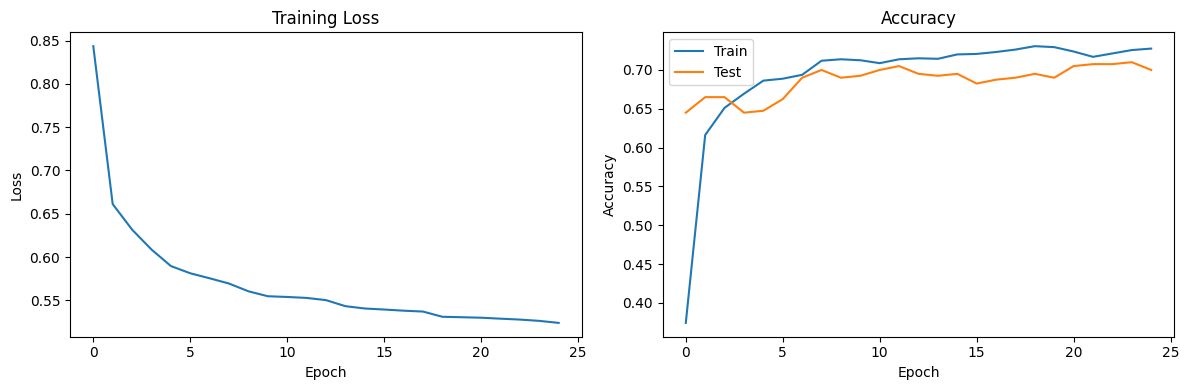

In [11]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load the data
file_path = '/content/sel_features.csv'
data = pd.read_csv(file_path)

# Split features and target
X = data.drop('TYPE', axis=1).values  # Modified to explicitly drop target column
y = data['TYPE'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the enhanced SAINT model
class EnhancedSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2,
                 num_self_attn_layers=2, use_intersample_attn=True):
        super(EnhancedSAINT, self).__init__()
        self.hidden_dim = hidden_dim
        self.use_intersample_attn = use_intersample_attn

        # Feature embedding
        self.embedding = nn.Linear(input_dim, hidden_dim)

        # Multiple self-attention layers
        self.self_attentions = nn.ModuleList([
            nn.MultiheadAttention(hidden_dim, num_heads, batch_first=True)
            for _ in range(num_self_attn_layers)
        ])
        self.self_attn_norms = nn.ModuleList([
            nn.LayerNorm(hidden_dim)
            for _ in range(num_self_attn_layers)
        ])

        # Intersample attention (optional)
        if use_intersample_attn:
            self.intersample_attention = nn.MultiheadAttention(hidden_dim, num_heads, batch_first=True)
            self.intersample_norm = nn.LayerNorm(hidden_dim)

        # Feed-forward network
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.ffn_norm = nn.LayerNorm(hidden_dim)

        # Classifier
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        # Embed features
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)  # Add sequence dimension if missing

        # Self-attention layers
        for attn, norm in zip(self.self_attentions, self.self_attn_norms):
            attn_out, _ = attn(x, x, x)
            x = norm(x + attn_out)

        # Intersample attention
        if self.use_intersample_attn:
            batch_size, num_features, _ = x.shape
            x_reshaped = x.reshape(-1, self.hidden_dim).unsqueeze(0)
            intersample_out, _ = self.intersample_attention(x_reshaped, x_reshaped, x_reshaped)
            x = x + intersample_out.squeeze(0).view(batch_size, num_features, self.hidden_dim)
            x = self.intersample_norm(x)

        # Feed-forward network
        ffn_out = self.ffn(x)
        x = self.ffn_norm(x + ffn_out)

        # Pool features and classify
        x = torch.mean(x, dim=1)
        return self.classifier(x)

# Initialize model
input_dim = X_train.shape[1]
model = EnhancedSAINT(
    input_dim=input_dim,
    hidden_dim=64,
    num_heads=4,
    num_classes=2,
    num_self_attn_layers=2,
    use_intersample_attn=True
)

# Verify PyTorch version
print(f"PyTorch version: {torch.__version__}")

# If you get the original error, try reinstalling PyTorch:
# !pip install torch --upgrade --force-reinstall

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 25
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    # Calculate test accuracy
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")

# Classification Metrics
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.numpy(), predicted.numpy()))

# ROC-AUC for binary classification
if len(set(y_test.numpy())) == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 10/10, Loss: 0.1634, Train Acc: 0.9956, Test Acc: 0.9950
Final Test Accuracy: 0.9950

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       0.99      0.99      0.99       179

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Confusion Matrix:
[[220   1]
 [  1 178]]

ROC-AUC Score: 0.9999


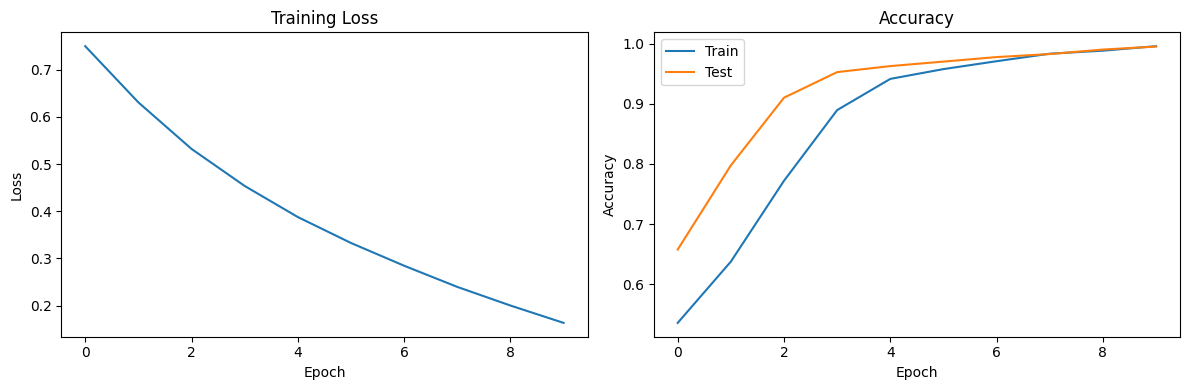

In [3]:
# Load the synthetic data from CSV and prepare it for the SAINT model
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load the data
file_path = '/content/sel_features.csv'
data = pd.read_csv(file_path)

# Split features and target
X = data.values
y = data['TYPE'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(
            embed_dim=hidden_dim,
            num_heads=num_heads,
            batch_first=True
        )
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    # Calculate test accuracy
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"Final Test Accuracy: {final_accuracy:.4f}")

# Classification Metrics (From Code 1)
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test.numpy(), predicted.numpy())
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute ROC-AUC Score (for binary classification)
if len(set(y_test.numpy())) == 2:  # Ensure binary classification
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()  # Get probabilities for class 1
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

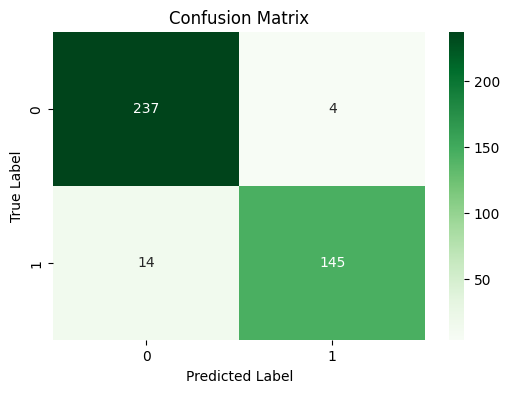

In [ ]:
import seaborn as sns

# Plot Confusion Matrix as a Table
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=set(y_test.numpy()), yticklabels=set(y_test.numpy()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#BORUTA + SAINT
!pip install boruta

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_csv("/content/synthetic_data_gc.csv")
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Random Forest and Boruta
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42, max_iter=100)

# Fit Boruta
boruta.fit(X_scaled, y.values)

# Select features
selected_features = X.columns[boruta.support_].tolist()
X_selected = df[selected_features]
X_selected['TYPE'] = y

# Save to CSV
X_selected.to_csv('sel_features_gc.csv', index=False)
print(f"Selected {len(selected_features)} features saved to 'sel_features.csv'.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.4 MB/s eta 0:00:00
Selected 14 features saved to 'sel_features.csv'.


<ipython-input-1-4192435911>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['TYPE'] = y


Epoch 10/10, Loss: 0.1783, Train Acc: 0.9775, Test Acc: 0.9950

Final Test Accuracy: 0.9950

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       241
           1       1.00      0.99      0.99       159

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400


Confusion Matrix:
[[241   0]
 [  2 157]]

ROC-AUC Score: 0.9997


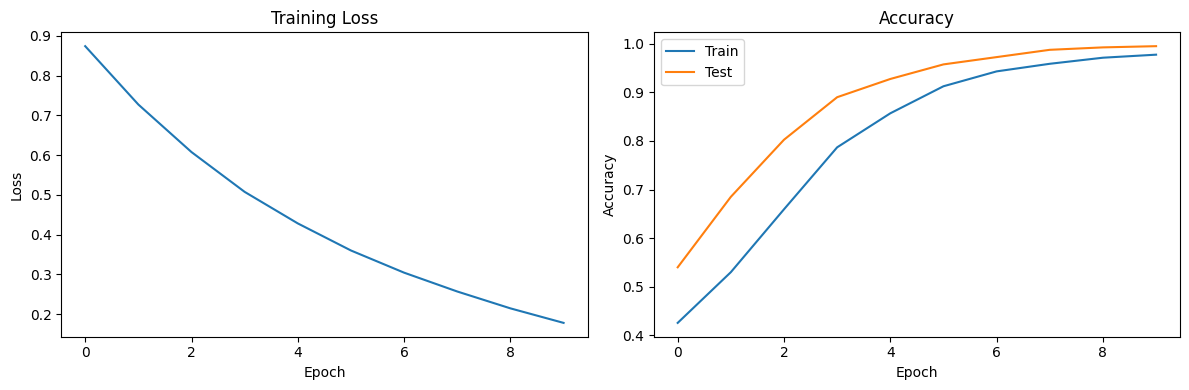

In [ ]:
# Load the synthetic data from CSV and prepare it for the SAINT model
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load the data
file_path = '/content/sel_features_gc.csv'
data = pd.read_csv(file_path)

# Split features and target
X = data.values
y = data['TYPE'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=3):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    # Calculate test accuracy
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")

# Classification Metrics (From Code 1)
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test.numpy(), predicted.numpy())
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute ROC-AUC Score (for binary classification)
if len(set(y_test.numpy())) == 2:  # Ensure binary classification
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()  # Get probabilities for class 1
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



=== Feature Scores (Mutual Information) ===
      Feature  MI Score
20        Age  0.051153
41        PCT  0.039849
36        NEU  0.039754
27        HE4  0.038702
29      CA125  0.038087
31       LYM%  0.036301
28       LYM#  0.028052
24        AFP  0.021556
47        ALP  0.019082
7          Mg  0.018913
16        MCH  0.018552
6       BASO%  0.017676
25        HGB  0.016423
12     CA19-9  0.016325
21        RDW  0.016161
22        PDW  0.015568
3        GLU.  0.015282
15        GGT  0.014847
19       DBIL  0.013679
26         Na  0.012741
38         TP  0.009065
35        PLT  0.008457
14       IBIL  0.008447
40        RBC  0.007839
9          CL  0.007455
8   Menopause  0.005385
18        ALT  0.004371
5         AST  0.004069
34      MONO#  0.003530
37        EO%  0.001594
33         AG  0.001574
0         MPV  0.001274
13        ALB  0.000885
17        GLO  0.000522
46        MCV  0.000260
11        EO#  0.000114
32         Ca  0.000000
4           K  0.000000
23       CREA  0.00

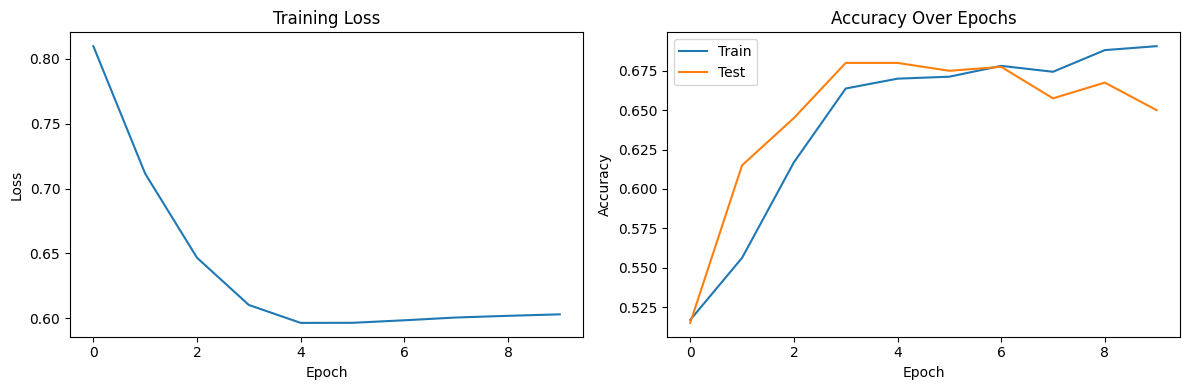

In [ ]:
#MI+SAINT
# Step 1: MI Feature Selection
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your data
df = pd.read_csv('/content/synthetic_data_gc.csv')  # <-- Update this path

# Separate features and target
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Ensure column names are strings
X.columns = X.columns.astype(str)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mutual Information scores
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)

# Display feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n=== Feature Scores (Mutual Information) ===")
print(feature_scores)

# Select top 10 features
top_features = feature_scores['Feature'][:10].tolist()
print("\n=== Top 10 Selected Features ===")
print(top_features)

X_selected = df[top_features]

# Step 2: Train/Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: SAINT Model Setup
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# Define SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Final Evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\n=== Final Test Accuracy: {final_accuracy:.4f} ===")
print("\n=== Classification Report ===")
print(classification_report(y_test.numpy(), predicted.numpy()))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.numpy(), predicted.numpy()))

# ROC-AUC (binary only)
if len(set(y_test.numpy())) == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"=== ROC-AUC Score: {roc_auc:.4f} ===")

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



✅ Best Alpha: 0.0010

=== Feature Scores ===
      Feature  Coefficient
25        HGB     0.126780
43       TBIL     0.047380
2        PHOS     0.045436
21        RDW     0.044961
41        PCT     0.039897
4           K     0.033901
7          Mg     0.033869
23       CREA     0.032335
18        ALT     0.026294
33         AG     0.022287
32         Ca     0.022024
16        MCH     0.021221
37        EO%     0.008811
11        EO#     0.006849
22        PDW     0.003809
31       LYM%     0.000000
19       DBIL     0.000000
1       BASO#     0.000000
3        GLU.     0.000000
15        GGT     0.000000
44        HCT     0.000000
38         TP     0.000000
42      CO2CP     0.000000
34      MONO#    -0.001473
45      MONO%    -0.001860
28       LYM#    -0.008723
0         MPV    -0.009214
12     CA19-9    -0.010670
10        CEA    -0.011884
29      CA125    -0.014372
47        ALP    -0.016335
39         UA    -0.020034
46        MCV    -0.021692
6       BASO%    -0.025384
26       

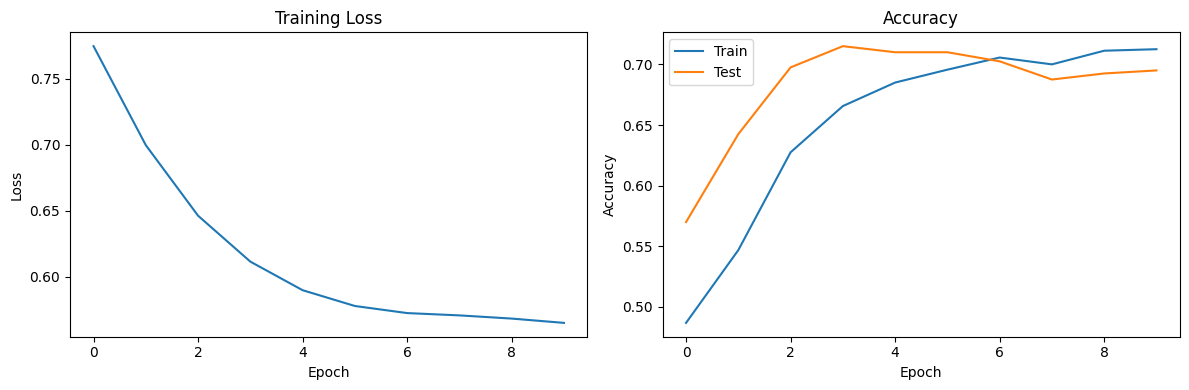

In [ ]:
# --- LASSO + SAINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load your dataset
df = pd.read_csv('/content/synthetic_data_gc.csv')  # <-- Change path
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply LASSO with CV
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=42)
lasso_cv.fit(X_train_fs, y_train_fs)

best_alpha = lasso_cv.alpha_
print(f"\n✅ Best Alpha: {best_alpha:.4f}")

lasso = Lasso(alpha=best_alpha, random_state=42)
lasso.fit(X_train_fs, y_train_fs)

# Feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n=== Feature Scores ===")
print(feature_scores)

# Select non-zero features
selected_features = feature_scores[feature_scores['Coefficient'] != 0]['Feature'].tolist()
print(f"\n✅ Selected Features ({len(selected_features)}):\n{selected_features}")

# Filter dataframe to selected features
X_selected = df[selected_features]

# --- SAINT Classification ---
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Train-test split on selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        return self.classifier(x)

# Initialize model
num_classes = len(np.unique(y))  # supports multi-class
model = SimpleSAINT(input_dim=X_train.shape[1], hidden_dim=64, num_heads=4, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses, train_accuracies, test_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, pred_train = torch.max(outputs, 1)
    train_acc = accuracy_score(y_train.numpy(), pred_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, pred_test = torch.max(test_outputs, 1)
        test_acc = accuracy_score(y_test.numpy(), pred_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Final metrics
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, final_pred = torch.max(final_outputs, 1)

print(f"\n✅ Final Test Accuracy: {accuracy_score(y_test.numpy(), final_pred.numpy()):.4f}")
print("\n=== Classification Report ===")
print(classification_report(y_test.numpy(), final_pred.numpy()))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.numpy(), final_pred.numpy()))

# ROC-AUC only for binary
if num_classes == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    auc_score = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {auc_score:.4f}")

# --- Plotting ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Best Alpha: 0.0236, Best L1 Ratio: 0.10
Epoch 1/10, Loss: 0.7259, Train Acc: 0.5456, Test Acc: 0.5800
Epoch 2/10, Loss: 0.6571, Train Acc: 0.6194, Test Acc: 0.6425
Epoch 3/10, Loss: 0.6134, Train Acc: 0.6606, Test Acc: 0.6700
Epoch 4/10, Loss: 0.5868, Train Acc: 0.6863, Test Acc: 0.6675
Epoch 5/10, Loss: 0.5723, Train Acc: 0.6987, Test Acc: 0.6650
Epoch 6/10, Loss: 0.5623, Train Acc: 0.7006, Test Acc: 0.6600
Epoch 7/10, Loss: 0.5551, Train Acc: 0.7075, Test Acc: 0.6575
Epoch 8/10, Loss: 0.5516, Train Acc: 0.7094, Test Acc: 0.6550
Epoch 9/10, Loss: 0.5482, Train Acc: 0.7131, Test Acc: 0.6425
Epoch 10/10, Loss: 0.5451, Train Acc: 0.7131, Test Acc: 0.6550

Final Test Accuracy: 0.6550

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       241
           1       0.56      0.58      0.57       159

    accuracy                           0.66       400
   macro avg       0.64      0.64      0.64       400
weighted avg  

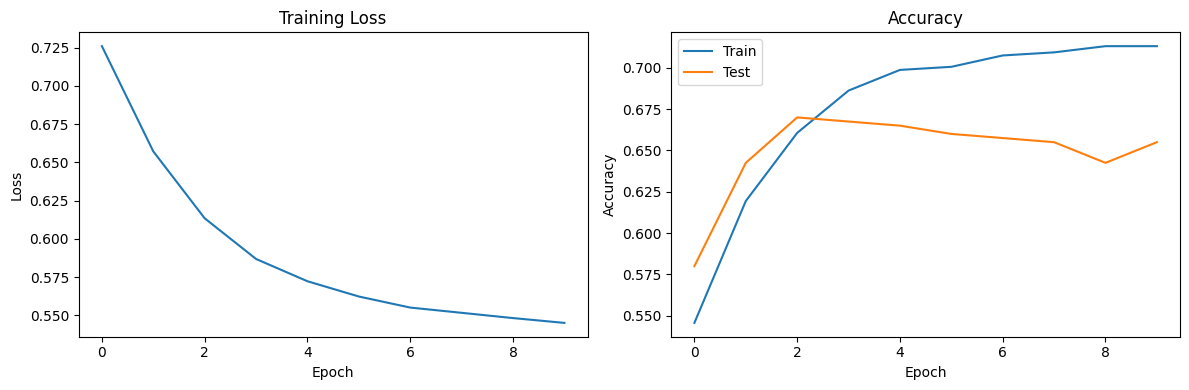

In [ ]:
# ELASTICNET + SAINT
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load your dataframe
df = pd.read_csv("/content/synthetic_data_gc.csv")

# Separate features and target variable
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ElasticNetCV for feature selection
elasticnet_cv = ElasticNetCV(
    alphas=np.logspace(-4, 1, 100),
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0],
    cv=5,
    random_state=42
)
elasticnet_cv.fit(X_train_full, y_train_full)

# Best hyperparameters
best_alpha = elasticnet_cv.alpha_
best_l1_ratio = elasticnet_cv.l1_ratio_
print(f"Best Alpha: {best_alpha:.4f}, Best L1 Ratio: {best_l1_ratio:.2f}")

# Fit final ElasticNet model
elasticnet = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
elasticnet.fit(X_train_full, y_train_full)

# Get non-zero coefficient features
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': elasticnet.coef_
}).sort_values(by='Coefficient', ascending=False)
selected_features = feature_scores[feature_scores['Coefficient'] != 0]['Feature'].tolist()
X_selected = df[selected_features]

# Save selected features (optional)
# X_selected.to_csv("sel_features.csv", index=False)

# Recreate X and y with selected features
X = X_selected.values
y = df['TYPE'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.numpy(), predicted.numpy()))

# ROC-AUC Score for binary
if len(set(y_test.numpy())) == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
